In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Hotel Guest Booking and Preference Data
    
    This dataset is from hotel data, This dataset includes information on occupancy rates room prices, and guest demographics, which can be used to identify trends and make informed business decisions.  By analyzing this hotel data, we can understand customer preferences, optimize pricing strategies, and improve the overall guest experience

In [2]:
df_book = pd.read_csv('dateset/hotel_bookings.csv', header=0)  
df_book.head()
# df_hr.dtypes 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:

df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
df_book['date_status']

0              July
1              July
2              July
3              July
4              July
            ...    
119385    September
119386    September
119387    September
119388    September
119389    September
Name: date_status, Length: 119390, dtype: object

In [4]:
df_book.groupby('arrival_date_month')['hotel'].count()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: hotel, dtype: int64

In [5]:
# df_book.columns
plt.style.use('fivethirtyeight')

montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
df_motly = pd.DataFrame(montly)
df_motly

,hotel
arrival_date_month,
April,11089
August,13877
December,6780
February,8068
January,5929
July,12661
June,10939
March,9794
May,11791


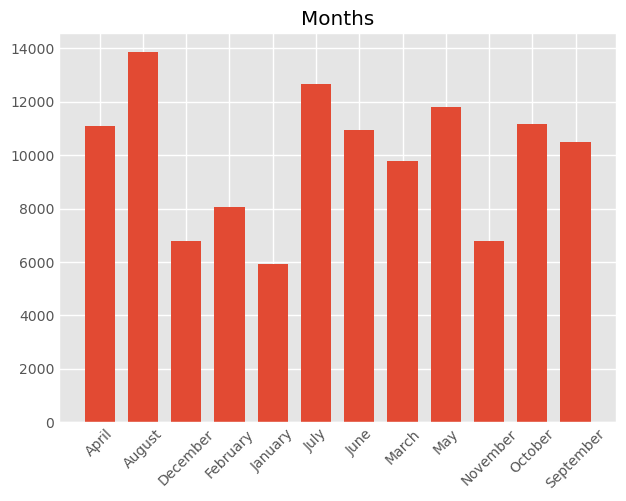

In [6]:
plt.style.use('ggplot')
plt.bar(df_motly.index ,  df_motly['hotel'] , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()
# df_motly.plt(kind='bar' ) 

# df_motly.

    SINCE IT THE MONTH ARE UNORDER I FIND SOME FUCKING SOLUtioN TO SOLVE THIS ONE
    

In [7]:
montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# montly = df_book.pivot_table(values= "hotel" , index=None, aggfunc='mean'  )
df_motly = pd.DataFrame(montly) 
df_motly = df_motly.reset_index()  
# display(df_motly)


def func_ordering(unorder_item) :
    #initialize the order and the dataframe might use
    order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    tb_ordered = pd.DataFrame([{
        'arrival_date_month' : '', 
        'hotel' : '' 
    }])
    
    for order in order_month:
        querys = unorder_item.query("arrival_date_month ==  @order " )
        # querys = querys.reset_index()
        tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)

    # DELETE THE empty table adn indexx
    tb_ordered= tb_ordered.query("hotel != ''").reset_index(drop=True)
    # tb_ordered = tb_ordered.set_index('arrival_date_month') 
    # display(tb_ordered)  
    return tb_ordered 
     

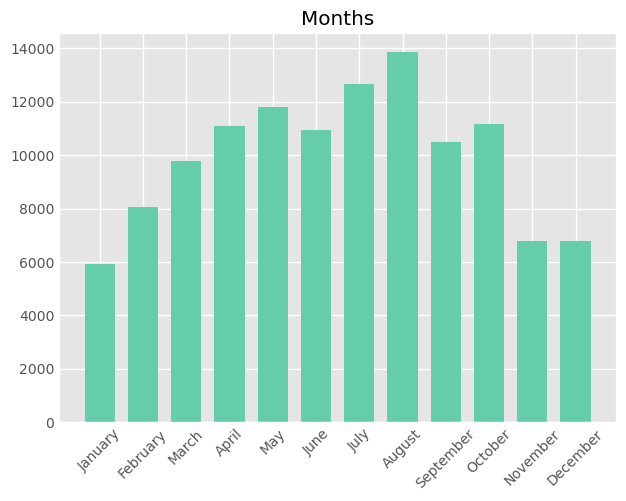

In [8]:
tb_arrival = func_ordering(df_motly)

greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_arrival['arrival_date_month'] ,  tb_arrival['hotel'] , color=greyn , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()




,arrival_date_month,hotel
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


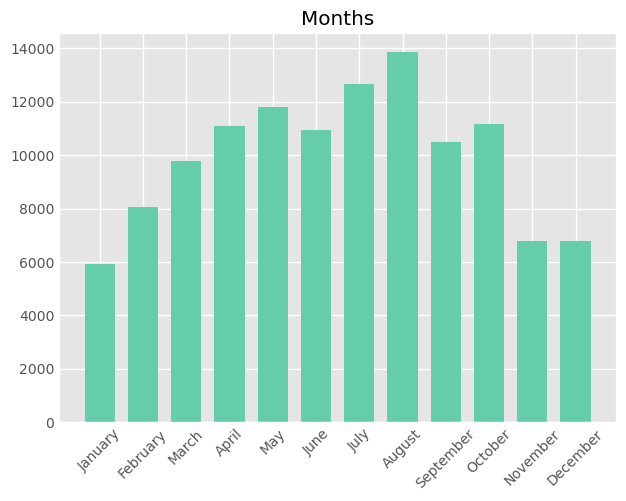

In [9]:
# SINCE IT THE MONTH ARE UNORDER I FIND SOME FUCKING SOLUtioN TO SOLVE THIS ONE

montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# montly = df_book.pivot_table(values= "hotel" , index=None, aggfunc='mean'  )
df_motly = pd.DataFrame(montly) 
df_motly = df_motly.reset_index()  
# display(df_motly)


#initialize the order and the dataframe might use
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
tb_ordered = pd.DataFrame([{
    'arrival_date_month' : '', 
    'hotel' : '' 
}])

for order in order_month:
    querys = df_motly.query("arrival_date_month ==  @order " )
    # querys = querys.reset_index()
    tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)
    
    # display(querys) 

# tb_ordered = tb_ordered()
# display(tb_ordered) 

# DELETE THE empty table adn indexx
tb_ordered= tb_ordered.query("hotel != ''").reset_index(drop=True)
# tb_ordered = tb_ordered.set_index('arrival_date_month') 
display(tb_ordered) 

greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_ordered['arrival_date_month'] ,  tb_ordered['hotel'] , color=greyn , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()


In [10]:
# montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
df_book

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,September
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,September
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,September
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,September


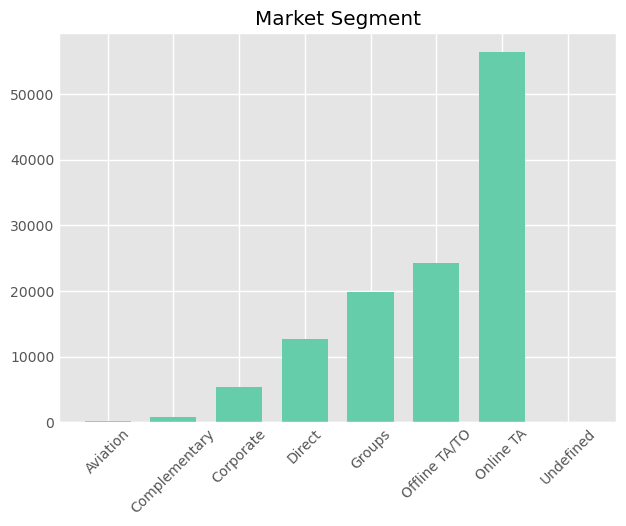

In [23]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_market_seg = df_book.pivot_table(index='market_segment'  , values='hotel' , aggfunc='count')  
greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_market_seg.index ,  tb_market_seg['hotel'] , color=greyn , width=0.7)
plt.title("Market Segment")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()

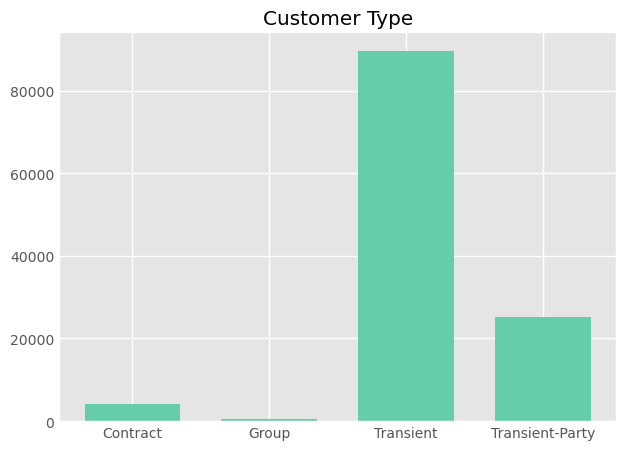

In [24]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_customertype = df_book.pivot_table(index='customer_type'  , values='hotel' , aggfunc='count') 


# tb_customertype
greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_customertype.index,  tb_customertype['hotel'] , color=greyn , width=0.7)
plt.title("Customer Type")
# plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()

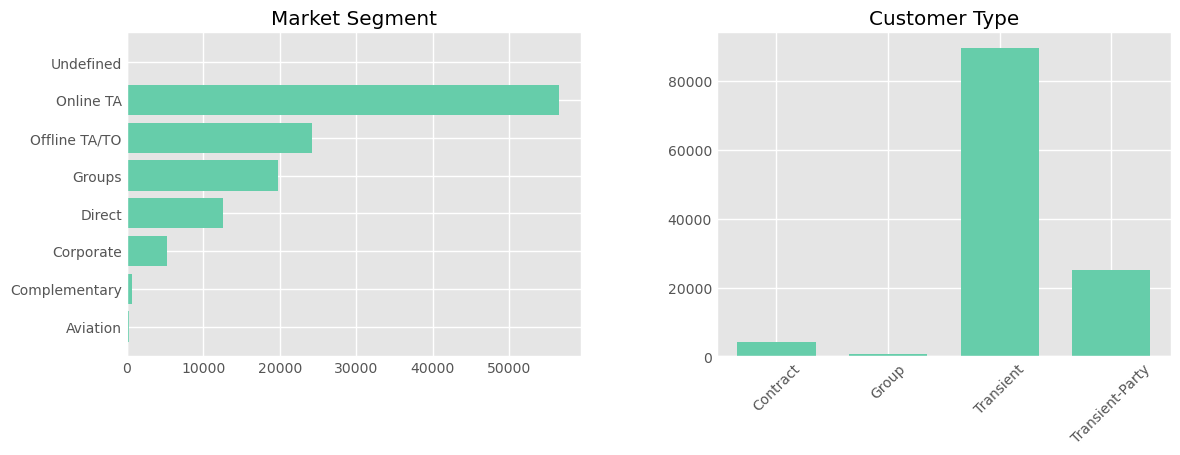

In [25]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3)
# fig, ax = plt.subplots(1 ,2  , figsize =( 8, 3 ) ) 

ax[0].barh(tb_market_seg.index ,  tb_market_seg['hotel'] , color=greyn  ) 
ax[1].bar(tb_customertype.index,  tb_customertype['hotel'] , color=greyn , width=0.7)
ax[0].set_title('Market Segment') 
ax[1].set_title('Customer Type')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show() 

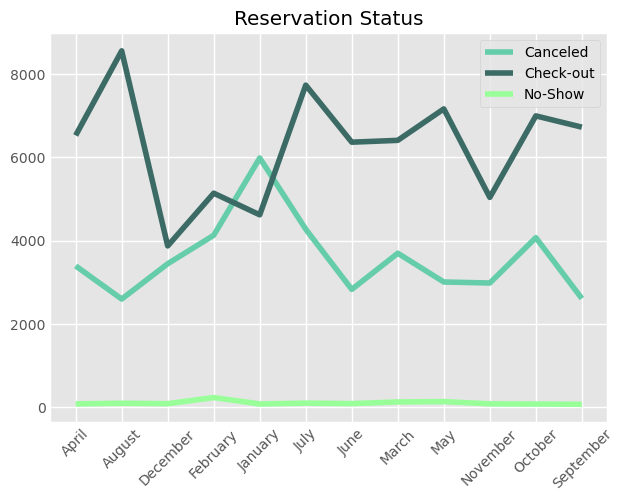

In [26]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_reservation = df_book.pivot_table(index='date_status'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

tb_reservation

greyn_main = '#66cdaa'
greyn_01 = '#3C6B66'
greyn_02 = '#99FF99'
## Vizualising this shit now
plt.style.use('ggplot')
plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn_main  , label='Canceled' )
plt.plot(tb_reservation.index , tb_reservation['Check-Out'] , color=greyn_01  , label='Check-out' )
plt.plot(tb_reservation.index , tb_reservation['No-Show'] , color=greyn_02 , label='No-Show'  )
plt.legend() 
# plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn  )
plt.title("Reservation Status")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show() 

 

In [15]:
# tb_reservation = df_book.pivot_table(index='reservation_status_date'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

# df['date_status'] = pd.to_datetime(df_book['reservation_status_date'] , format='%d-%m/%Y') 
df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
df_book['date_status']
# tb_reservation

# QUERY RIGHT FILTER TO City Hotel VS Resort Hotel

filter_book_city = df_book[df_book['hotel'] == 'City Hotel' ]
filter_book_resort = df_book[df_book['hotel'] == 'Resort Hotel']
# display(filter )

# filter_book_city['date_status']

tb_reservation_city = filter_book_city.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count')
tb_reservation_resort = filter_book_resort.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count')

display(tb_reservation_city.head())
display(tb_reservation_resort.head())



reservation_status,Canceled,Check-Out,No-Show
date_status,,,
April,2434,4000,63
August,1846,5293,69
December,2708,2093,45
February,3121,2900,190
January,4671,2530,56


reservation_status,Canceled,Check-Out,No-Show
date_status,,,
April,959,2529,14
August,750,3268,23
December,737,1780,37
February,1008,2240,39
January,1315,2090,19


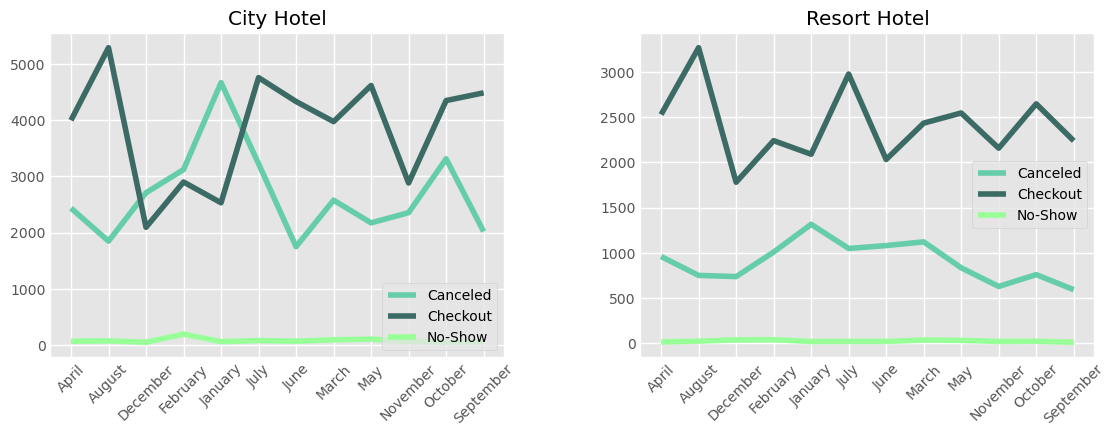

In [16]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 

ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['No-Show'] , color=greyn_02, label='No-Show'  )  
# ax[1].plot(tb_customertype.index,  tb_customertype['hotel'] , color=greyn )
ax[0].set_title('City Hotel') 

ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['No-Show'] , color=greyn_02, label='No-Show'  )  
# ax[1].plot(tb_customertype.index,  tb_customertype['hotel'] , color=greyn )
ax[1].set_title('Resort Hotel') 
# plt.xticks(rotation=45)
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis='x', which='both', labelrotation=45)
ax[0].legend(loc='lower right') 
ax[1].legend()
# ax[1].set_title('Customer Type')



,arrival_date_month,hotel,Canceled,Check-Out,No-Show,mean
0,January,NaN,118982.21,185190.07,4529.61,407368.641667
1,February,NaN,144218.58,264064.79,14179.93,407368.641667
2,March,NaN,222392.89,367175.18,8721.17,407368.641667
3,April,NaN,375537.33,449105.15,7521.27,407368.641667
4,May,NaN,437451.38,551521.51,12355.74,407368.641667
5,June,NaN,418616.22,513887.26,7469.37,407368.641667
6,July,NaN,334786.01,552626.14,8206.80,407368.641667
7,August,NaN,384899.66,637175.42,8099.45,407368.641667
8,September,NaN,323856.50,483047.36,7130.63,407368.641667
9,October,NaN,313352.12,441272.21,5681.73,407368.641667


,arrival_date_month,hotel,Canceled,Check-Out,No-Show,mean
0,January,NaN,16565.34,90988.26,916.31,218937.6025
1,February,NaN,44056.36,124972.38,2169.76,218937.6025
2,March,NaN,43506.87,146693.13,1687.21,218937.6025
3,April,NaN,86522.08,193462.93,973.82,218937.6025
4,May,NaN,83662.08,194326.91,2311.21,218937.6025
5,June,NaN,114187.59,219944.77,2171.90,218937.6025
6,July,NaN,235495.14,470934.37,3214.57,218937.6025
7,August,NaN,319592.96,590187.59,4372.52,218937.6025
8,September,NaN,85868.29,202668.24,1290.78,218937.6025
9,October,NaN,60450.37,159071.78,1234.88,218937.6025


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

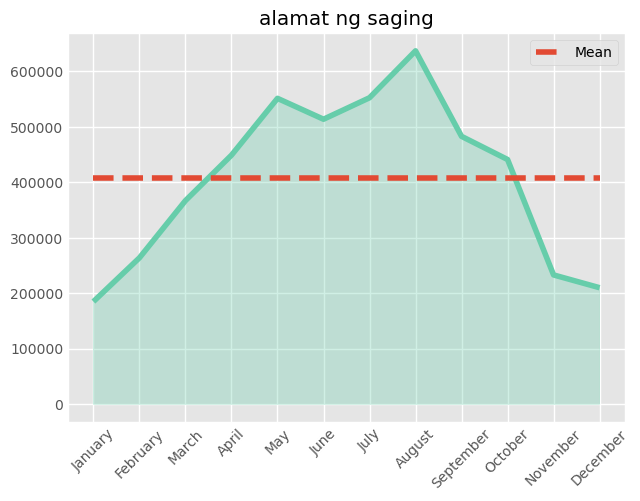

In [17]:
# tb_resort = df_book[df_book['hotel'] = 'City Hotel']

tb_arrival_city = filter_book_city.pivot_table(index='arrival_date_month' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_arrival_city = tb_arrival_city.reset_index()  
tb_arrival_city = func_ordering(tb_arrival_city) 
tb_arrival_city['mean'] = tb_arrival_city['Check-Out'].mean()
display(tb_arrival_city)

tb_arrival_resort = filter_book_resort.pivot_table(index='arrival_date_month' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_arrival_resort = tb_arrival_resort.reset_index()  
tb_arrival_resort = func_ordering(tb_arrival_resort) 
tb_arrival_resort['mean'] = tb_arrival_resort['Check-Out'].mean()
display(tb_arrival_resort)


plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=greyn) 
plt.fill_between(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
plt.title('alamat ng saging')
# plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
plt.legend()
plt.xticks(rotation=45) 
# plt.show()



# display(tb_arrival_city)


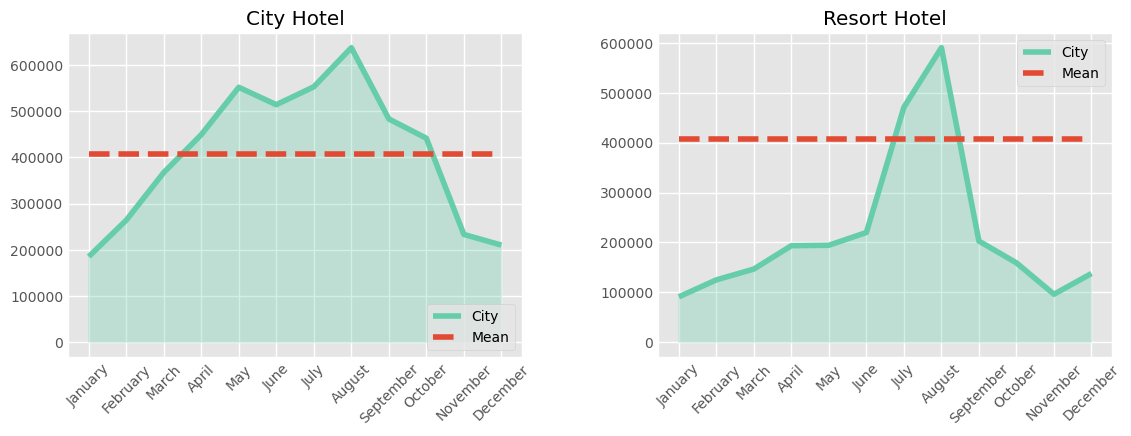

In [18]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 

ax[0].plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=greyn , label='City') 
ax[0].fill_between(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
ax[0].plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 

ax[1].plot(tb_arrival_resort['arrival_date_month'] , tb_arrival_resort['Check-Out'], color=greyn , label='City') 
ax[1].fill_between(tb_arrival_resort['arrival_date_month'] , tb_arrival_resort['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
ax[1].plot(tb_arrival_resort['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
ax[0].set_title('City Hotel') 

ax[1].set_title('Resort Hotel') 
# plt.xticks(rotation=45)
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis='x', which='both', labelrotation=45)
ax[0].legend(loc='lower right') 
ax[1].legend()



([<matplotlib.patches.Wedge at 0x1c2680e0a10>,
 [Text(-0.3373603166819871, 1.0469899792873998, 'A'),
  Text(-0.8314666421674314, -0.7201827705262165, 'B'),
  Text(-0.7556236108584631, -0.7993953707104001, 'C'),
  Text(0.05470419857686236, -1.09863890822147, 'D'),
  Text(0.9210487494825041, -0.6013893922216416, 'E'),
  Text(1.0538512917212401, -0.3152736191587773, 'F'),
  Text(1.096212563976022, -0.09120315006136645, 'G'),
  Text(1.0999548940615738, -0.00996147729969379, 'K'),
  Text(1.099999999999907, -4.521879780868405e-07, 'P')],
 [Text(-0.18401471819017476, 0.5710854432476725, '59.9%'),
  Text(-0.4535272593640534, -0.39282696574157255, '2.9%'),
  Text(-0.41215833319552525, -0.43603383856930916, '0.3%'),
  Text(0.029838653769197646, -0.5992575863026199, '25.4%'),
  Text(0.5023902269904568, -0.32803057757544085, '4.6%'),
  Text(0.5748279773024946, -0.1719674286320603, '4.5%'),
  Text(0.5979341258051029, -0.04974717276074533, '2.1%'),
  Text(0.5999753967608583, -0.005433533072560249, '

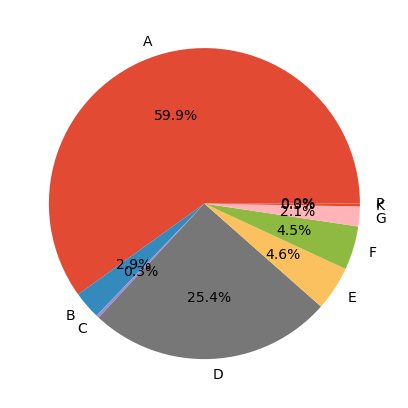

In [19]:
tb_room_resort = filter_book_resort.pivot_table(index='assigned_room_type' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_room_resort = tb_room_resort.reset_index()
tb_room_resort

tb_room_city = filter_book_city.pivot_table(index='assigned_room_type' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_room_city = tb_room_city.reset_index()

# tb_room_cty 

tb_room_city['Check-Out'] = tb_room_city['Check-Out'].fillna(0) 
# print(tb_room_city['Check-Out'].isna().sum())   
plt.pie(tb_room_city['Check-Out']    , labels=tb_room_city['assigned_room_type'] ,  autopct='%1.1f%%' )


# print(tb_room_city['Check-Out'].isna().su 

# if tb_room_['Check-Out'].isna() 
# print(tb_room_city['Check-Out'].isna().sum()
# plt.pie(tb_room_city['assigned_room_type']    , labels=tb_room_city['Check-Out'])
# tb_room_resort.dtypes
# tb_room_city.dtypes
#


In [44]:
# tb_weekday = filter_book_resort.pivot_table(index='date_status' , values='adr' , columns=['stays_in_week_nights' , 'stays_in_weekend_nights'] , aggfunc='sum')
tb_weekday = filter_book_resort.pivot_table(index='date_status' ,   values=['stays_in_week_nights' , 'stays_in_weekend_nights'] , columns='reservation_status' , aggfunc='sum')
tb_weekday = tb_weekday.reset_index()
tb_weekday.head() 


# filter_book_resort['reservatio']




date_status stays_in_week_nights                    \
reservation_status                         Canceled Check-Out No-Show   
0                        April                 3216      7366      21   
1                       August                 2511     12047      75   
2                     December                 2605      3778      64   
3                     February                 3561      4531      87   
4                      January                 4638      4461      52   

                   stays_in_weekend_nights                    
reservation_status                Canceled Check-Out No-Show  
0                                     1223      2580      10  
1                                      970      4771      30  
2                                      958      1499      14  
3                                     1311      1769      32  
4                                     1735      1363      14

In [21]:
import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Value1': ['A', 'B', 'C']
}, index=['a', 'b', 'c'])

df2 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Value2': ['D', 'E', 'F']
}, index=['a', 'b', 'c'])


display(df1)
display(df2)


# Merge by index
result = pd.merge(df1, df2, left_index=True, right_index=True)
print(result)

,ID,Value1
a,1,A
b,2,B
c,3,C


,ID,Value2
a,1,D
b,2,E
c,3,F


   ID_x Value1  ID_y Value2
a     1      A     1      D
b     2      B     2      E
c     3      C     3      F


In [43]:
# tb_weekday['stays_in_week_nights']['mean'] = tb_weekday['stays_in_week_nights']['Check-Out'].mean()
tb_weekday['mea'] = tb_weekday['stays_in_week_nights']['Check-Out'].mean()
tb_week_nights_resort = tb_weekday['stays_in_week_nights']
tb_weeks = tb_weekday['date_status']

tb_merge_weeks_resort = pd.merge(tb_week_nights_resort , tb_weeks, left_index=True , right_index=True) 

display(tb_weekday.head()) 
display(tb_week_nights_resort.head())
display(tb_merge_weeks_resort)



date_status stays_in_week_nights                    \
reservation_status                         Canceled Check-Out No-Show   
0                        April                 3216      7366      21   
1                       August                 2511     12047      75   
2                     December                 2605      3778      64   
3                     February                 3561      4531      87   
4                      January                 4638      4461      52   

                   stays_in_weekend_nights                            mea  
reservation_status                Canceled Check-Out No-Show               
0                                     1223      2580      10  7256.166667  
1                                      970      4771      30  7256.166667  
2                                      958      1499      14  7256.166667  
3                                     1311      1769      32  7256.166667  
4                                     1735      1363      14  7256.166667

reservation_status,Canceled,Check-Out,No-Show
0,3216,7366,21
1,2511,12047,75
2,2605,3778,64
3,3561,4531,87
4,4638,4461,52


,Canceled,Check-Out,No-Show,date_status
0,3216,7366,21,April
1,2511,12047,75,August
2,2605,3778,64,December
3,3561,4531,87,February
4,4638,4461,52,January
5,3626,11337,57,July
6,3770,7381,67,June
7,3966,6769,80,March
8,2961,7240,70,May
9,1950,5789,40,November


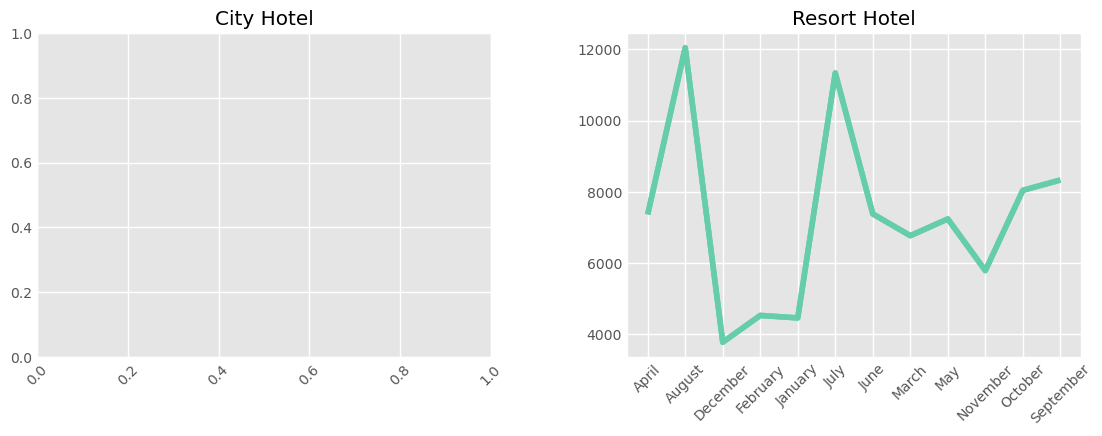

In [40]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 
ax[1].plot(tb_merge_weeks_resort['date_status'] , tb_merge_weeks_resort['Check-Out'], color=greyn , label='City') 
ax[1].plot(tb_merge_weeks_resort['date_status'] , tb_merge_weeks_resort['Check-Out'], color=greyn , label='Resort') 
# ax[0].fill_between(tb_merge_weeks_resort['date_status'] , tb_merge_weeks_resort['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
# ax[0].plot(tb_merge_weeks_resort['date_status'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 


ax[0].set_title('City Hotel') 
ax[1].set_title('Resort Hotel') 
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis='x', which='both', labelrotation=45)
# ax[0].legend(loc='lower right') 

# Stratch with bugs 

In [ ]:
# gagi = tb_ordered[tb_ordered['hotel'] == '']  
# gagi

sampol = tb_ordered.query("arrival_date_month != ''") 
# df_dropp = tb_ordered.drop('March' , axis=0) 
# df_dropp
sampol = sampol.reset_index(drop=True)

# sampol
# tb_ordered


In [ ]:
# months = ['July', 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June']

# Define a function to extract the month's numerical position
# def get_month_index(month):
    # month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#     # print( month_order.index(month))
#     # returnt() 

mon = pd.DataFrame({
    "month" : [ 'July' , 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June' ], 
    "color" : ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Black', 'White', 'Gray', 'Cyan']
})

mon 


# new_Row =  pd.DataFrame([{'month': '' ,  'color' : ''}])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mon = pd.concat([mon , new_Row] , ignore_index=True) 

# mon

init_mon = {"month":  "" , 'color' : ""} 
# init_mon 

new_month = pd.DataFrame([init_mon])
new_month 
# for month_or in month_order : 
#     # print(month_or) 
#     if month_or == 



In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 28],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}

df = pd.DataFrame(data)

# Select rows where 'Name' is 'Alice' or 'Bob'
 


# selected_rows = df.loc[ [2] , ['Age']] # Using a list of row labels (index names) 
# print(selected_rows ==  ) 

# order_name = ['Bob' , 'Name' , 'David' ,  'Charlie']
# def orderings(selected): 
#     # print(selected =='Bob')
#     for x in order_name:  
#         # print)a
#         # print(x)
#         if x == selected:
#             print("match")
#         # else : 
        #     print("not exist")


 
 
# for x in range(len(df)): 
#     selected_rows = df.loc[ x , ['Name']]
    
#     # if .any()  :
#         # print('has mtch')
#     # print(selected_rows == '')
#     # display(selected_rows) 
#     # Using a list of row labels (index names) 
#     # if selected_rows == order_name[x] : 
#     #     print('match')
display(df)

# name = 'Bob'


init_name = pd.DataFrame([{
    'Name' : '' , 
    'Age'  :  '' , 
    'City' : ''
}])


display(init_name)

order_name = ['Bob' , 'Alice' , 'David' ,  'Charlie']
for order in order_name :
    filter_df = df.query("Name == @order")
    init_name = pd.concat([init_name , filter_df] , ignore_index=True)
    # display(filter_df)


display(init_name)



